# Classification Ring OOD Experiment: Concentric Rings with Gap

This notebook implements an OOD (Out-of-Distribution) experiment using concentric rings.

## Experimental Setup

**Training Data (Rings):**
- Inner ring: radius [0.5, 1.5], label 0
- Outer ring: radius [2.5, 3.5], label 1

**OOD Data (Gap):**
- Random points in the gap between rings: radius [1.5, 2.5]
- No training data in this region

**Expected Behavior:**
- High accuracy on ring data (training distribution)
- High epistemic uncertainty (EU) in the gap region
- Low aleatoric uncertainty (AU) in the gap region (no class overlap)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# Ensure project root is on sys.path when running from Experiments/
project_root = Path.cwd().parent if Path.cwd().name == "Experiments" else Path.cwd()
sys.path.insert(0, str(project_root))

from utils.classification_data import simulate_ring_ood_dataset
from utils.classification_experiments import (
    run_mc_dropout_it_ring_ood_experiment,
    run_mc_dropout_gl_ring_ood_experiment,
    run_deep_ensemble_it_ring_ood_experiment,
    run_deep_ensemble_gl_ring_ood_experiment,
    run_bnn_it_ring_ood_experiment,
    run_bnn_gl_ring_ood_experiment,
)

np.random.seed(42)

## Configuration

In [2]:
base_cfg = {
    # Ring geometry
    "N_train": 2000,
    "inner_r_min": 0.5,
    "inner_r_max": 1.5,
    "outer_r_min": 2.5,
    "outer_r_max": 3.5,
    "n_gap_points": 500,
    # Noise parameters
    "coord_noise_std": 0.1,    # Gaussian noise on x,y coordinates
    "label_noise_rate": 0.05,  # 5% label flip probability
    # Model params
    "epochs": 300,
    "batch_size": 32,
    "lr": 1e-3,
    "dropout_p": 0.25,
    "mc_samples": 100,
    "gl_samples": 100,
    "K": 20,
    "hidden_width": 32,
    "weight_scale": 1.0,
}

seed = 42

## Data Visualization

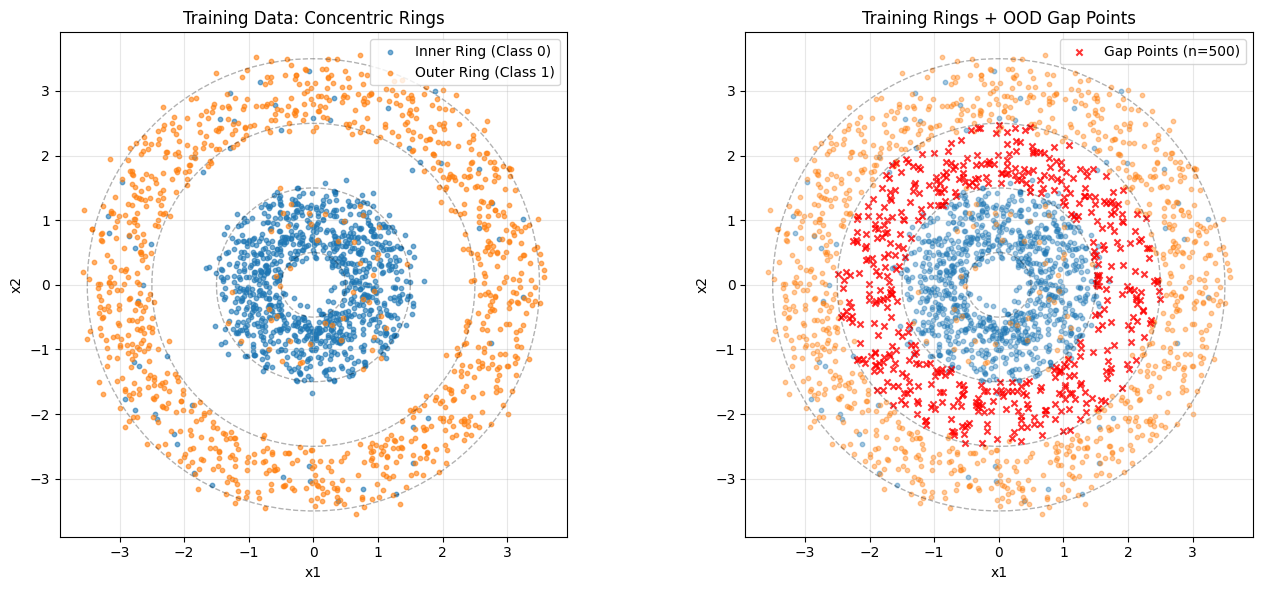

Training samples: 2000 (1000 per class)
Gap points: 500
Inner ring: radius [0.5, 1.5]
Outer ring: radius [2.5, 3.5]
Gap region: radius [1.5, 2.5]


In [3]:
# Generate data for visualization
X_train, y_train, X_gap, meta = simulate_ring_ood_dataset({**base_cfg, "seed": seed})

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Training rings
ax1 = axes[0]
colors = ['tab:blue', 'tab:orange']
for cls in range(2):
    mask = y_train == cls
    label = "Inner Ring (Class 0)" if cls == 0 else "Outer Ring (Class 1)"
    ax1.scatter(X_train[mask, 0], X_train[mask, 1], c=colors[cls], s=10, alpha=0.6, label=label)
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_title("Training Data: Concentric Rings")
ax1.set_aspect('equal')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Draw ring boundaries
theta = np.linspace(0, 2*np.pi, 100)
for r in [meta['inner_r_min'], meta['inner_r_max'], meta['outer_r_min'], meta['outer_r_max']]:
    ax1.plot(r * np.cos(theta), r * np.sin(theta), 'k--', alpha=0.3, linewidth=1)

# Plot 2: Rings + Gap points
ax2 = axes[1]
for cls in range(2):
    mask = y_train == cls
    ax2.scatter(X_train[mask, 0], X_train[mask, 1], c=colors[cls], s=10, alpha=0.4)
ax2.scatter(X_gap[:, 0], X_gap[:, 1], c='red', s=20, alpha=0.8, marker='x', label=f"Gap Points (n={len(X_gap)})")
ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_title("Training Rings + OOD Gap Points")
ax2.set_aspect('equal')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Draw ring boundaries
for r in [meta['inner_r_min'], meta['inner_r_max'], meta['outer_r_min'], meta['outer_r_max']]:
    ax2.plot(r * np.cos(theta), r * np.sin(theta), 'k--', alpha=0.3, linewidth=1)

plt.tight_layout()
plt.show()

print(f"Training samples: {len(X_train)} ({len(X_train)//2} per class)")
print(f"Gap points: {len(X_gap)}")
print(f"Inner ring: radius [{meta['inner_r_min']}, {meta['inner_r_max']}]")
print(f"Outer ring: radius [{meta['outer_r_min']}, {meta['outer_r_max']}]")
print(f"Gap region: radius [{meta['gap_r_min']}, {meta['gap_r_max']}]")

## Run Experiments

### MC Dropout IT


Training mc_dropout_it (IT) - Ring OOD Experiment
CUDA not available. Using CPU.
[MC Dropout IT] Epoch 100/300 - avg loss 0.2133
[MC Dropout IT] Epoch 200/300 - avg loss 0.2203
[MC Dropout IT] Epoch 300/300 - avg loss 0.2114
CUDA not available. Using CPU.
CUDA not available. Using CPU.
CUDA not available. Using CPU.
  Ring Accuracy: 0.9480, ECE: 0.0118
  Ring  - Mean TU: 0.2296, AU: 0.2175, EU: 0.0121
  Gap   - Mean TU: 0.4761, AU: 0.4367, EU: 0.0394
Saved classification outputs: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\outputs\classification\ring_ood\mc_dropout_it\mc_dropout_it_ring_ood_outputs.npz
Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\noise_level\plots\classification\ring_ood\mc_dropout_it\heatmaps\mc_dropout_it_panel_ring_ood.png


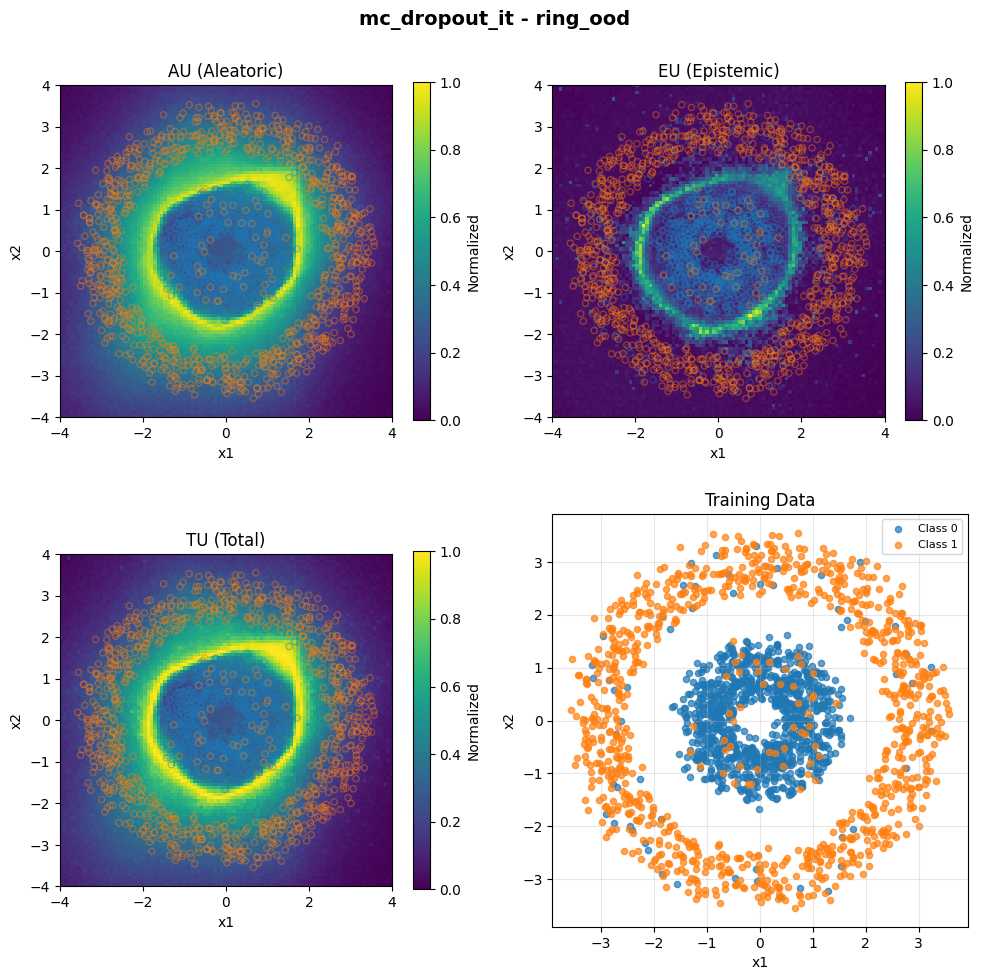

Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\noise_level\plots\classification\ring_ood\mc_dropout_it\heatmaps\mc_dropout_it_panel_ring_ood_gap.png


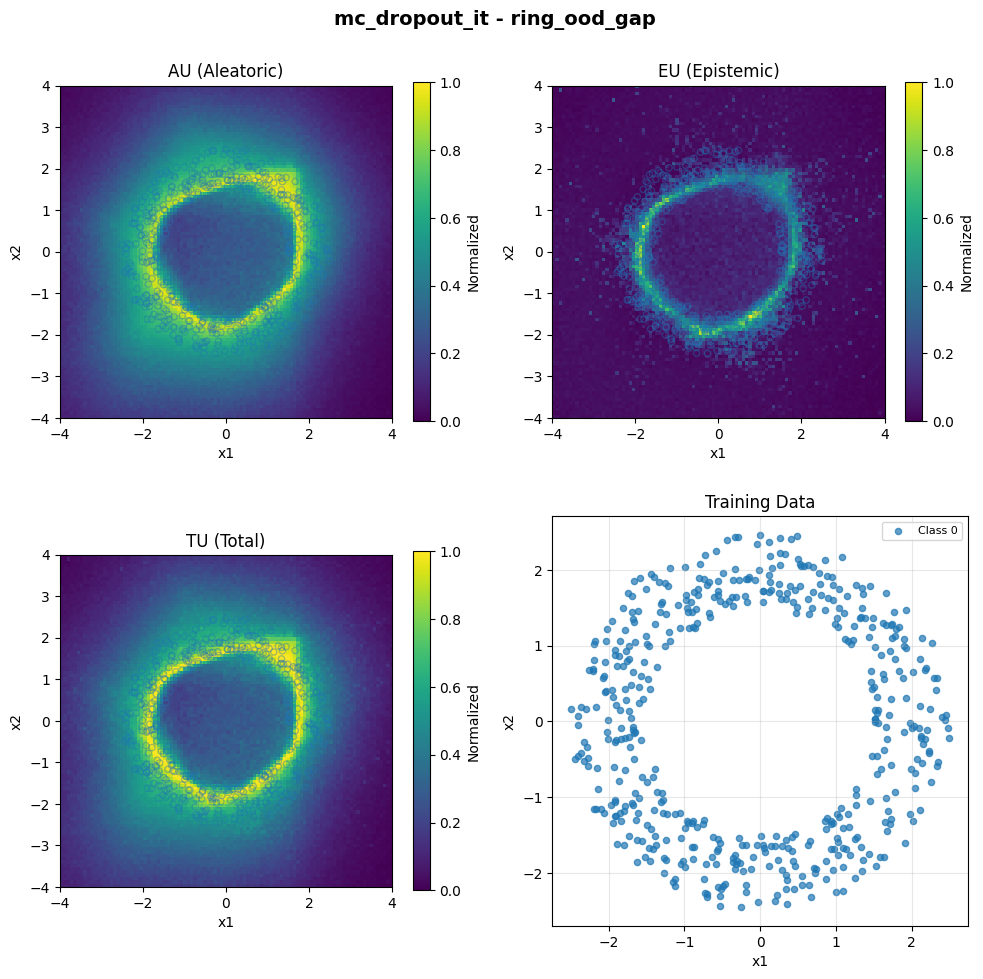

  Saved: results\classification\ring_ood\mc_dropout_it\mc_dropout_it_ring_gap_comparison.png
Saved statistics: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\noise_level\statistics\classification\ring_ood\mc_dropout_it\mc_dropout_it_ring_ood_summary.xlsx


In [4]:
results_mc_dropout_it = run_mc_dropout_it_ring_ood_experiment(
    base_cfg=base_cfg,
    seed=seed,
)

### MC Dropout GL


Training mc_dropout_gl (GL) - Ring OOD Experiment
CUDA not available. Using CPU.
[MC Dropout GL] Epoch 100/300 - avg loss 0.2410
[MC Dropout GL] Epoch 200/300 - avg loss 0.2296
[MC Dropout GL] Epoch 300/300 - avg loss 0.2226
CUDA not available. Using CPU.
CUDA not available. Using CPU.
CUDA not available. Using CPU.
  Ring Accuracy: 0.9480, ECE: 0.0156
  Ring  - Mean AU: 0.2101, EU: 0.2288
  Gap   - Mean AU: 0.5195, EU: 0.5315
Saved classification outputs: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\classification\outputs\classification\ring_ood\mc_dropout_gl\mc_dropout_gl_ring_ood_outputs.npz
Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\noise_level\plots\classification\ring_ood\mc_dropout_gl\heatmaps\mc_dropout_gl_panel_ring_ood.png


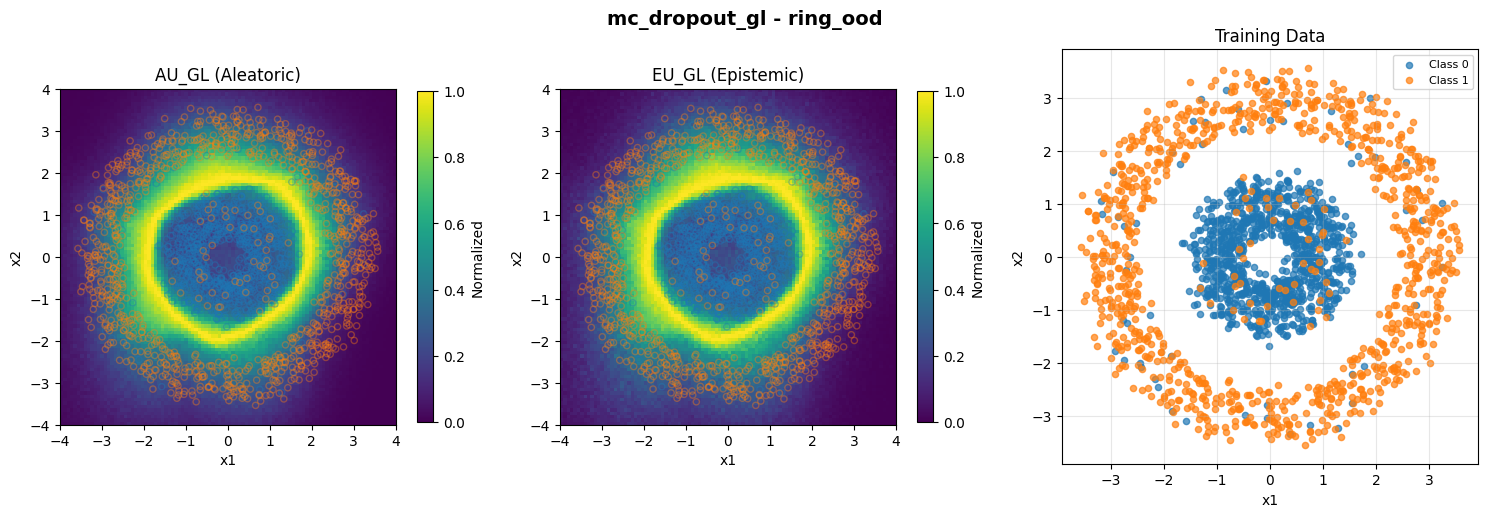

Saved plot: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\noise_level\plots\classification\ring_ood\mc_dropout_gl\heatmaps\mc_dropout_gl_panel_ring_ood_gap.png


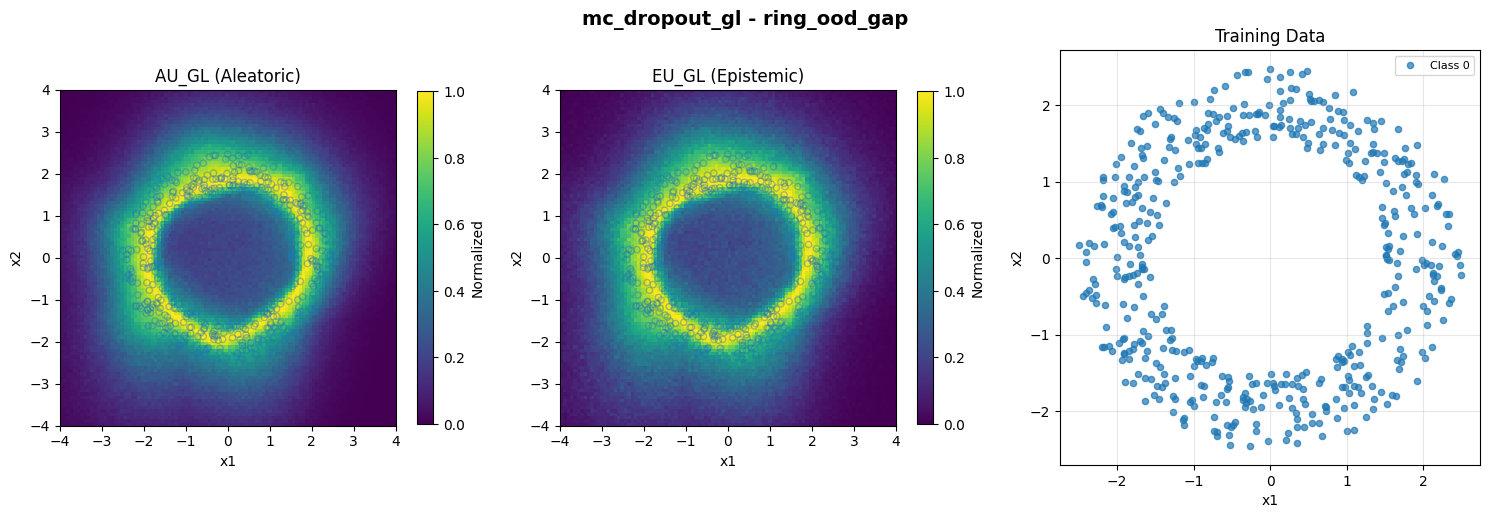

  Saved: results\classification\ring_ood\mc_dropout_gl\mc_dropout_gl_ring_gap_comparison.png
Saved statistics: c:\Users\lukas\OneDrive\Desktop\Code-Masterarbeit\A-statistical-evaluation-of-uncertainty-disentanglement-methods-1\results\noise_level\statistics\classification\ring_ood\mc_dropout_gl\mc_dropout_gl_ring_ood_summary.xlsx


In [5]:
results_mc_dropout_gl = run_mc_dropout_gl_ring_ood_experiment(
    base_cfg=base_cfg,
    seed=seed,
)

### Deep Ensemble IT

In [ ]:
results_deep_ensemble_it = run_deep_ensemble_it_ring_ood_experiment(
    base_cfg=base_cfg,
    seed=seed,
)

### Deep Ensemble GL

In [ ]:
results_deep_ensemble_gl = run_deep_ensemble_gl_ring_ood_experiment(
    base_cfg=base_cfg,
    seed=seed,
)

### BNN IT

In [ ]:
results_bnn_it = run_bnn_it_ring_ood_experiment(
    base_cfg=base_cfg,
    seed=seed,
)

### BNN GL

In [ ]:
results_bnn_gl = run_bnn_gl_ring_ood_experiment(
    base_cfg=base_cfg,
    seed=seed,
)

## Results Summary

In [ ]:
import pandas as pd

# Collect results
all_results = {
    "MC Dropout IT": results_mc_dropout_it,
    "MC Dropout GL": results_mc_dropout_gl,
    "Deep Ensemble IT": results_deep_ensemble_it,
    "Deep Ensemble GL": results_deep_ensemble_gl,
    "BNN IT": results_bnn_it,
    "BNN GL": results_bnn_gl,
}

summary_data = []
for name, r in all_results.items():
    unc_train = r["uncertainty_train"]
    unc_gap = r["uncertainty_gap"]
    
    row = {
        "Model": name,
        "Accuracy (Ring)": f"{r['metrics_train']['accuracy']:.3f}",
        "ECE (Ring)": f"{r['metrics_train']['ece']:.3f}",
        "AU (Ring)": f"{unc_train['AU'].mean():.4f}",
        "AU (Gap)": f"{unc_gap['AU'].mean():.4f}",
        "EU (Ring)": f"{unc_train['EU'].mean():.4f}",
        "EU (Gap)": f"{unc_gap['EU'].mean():.4f}",
    }
    
    # Add TU for IT models
    if "TU" in unc_train:
        row["TU (Ring)"] = f"{unc_train['TU'].mean():.4f}"
        row["TU (Gap)"] = f"{unc_gap['TU'].mean():.4f}"
    
    summary_data.append(row)

df_summary = pd.DataFrame(summary_data)
print("\n" + "="*80)
print("RING OOD EXPERIMENT SUMMARY")
print("="*80)
print(f"\nExpected: EU should be HIGHER in Gap region (no training data)")
print(f"Expected: AU should be LOW in Gap region (no class overlap)\n")
print(df_summary.to_string(index=False))

In [ ]:
# Plot EU comparison: Ring vs Gap
models = list(all_results.keys())
eu_ring = [all_results[m]["uncertainty_train"]["EU"].mean() for m in models]
eu_gap = [all_results[m]["uncertainty_gap"]["EU"].mean() for m in models]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))
bars1 = ax.bar(x - width/2, eu_ring, width, label='Ring (Training)', color='tab:blue', alpha=0.7)
bars2 = ax.bar(x + width/2, eu_gap, width, label='Gap (OOD)', color='tab:red', alpha=0.7)

ax.set_ylabel('Mean Epistemic Uncertainty (EU)')
ax.set_title('Epistemic Uncertainty: Ring vs Gap Region')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()